#Importing Libraries and Dataset

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [109]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [110]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#Data Exploration

In [111]:
#No:of columns and Rows
df.shape

(8425, 23)

In [112]:
#column names
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [113]:
#Overall summary of dat
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

#Value Counts

In [114]:
df['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

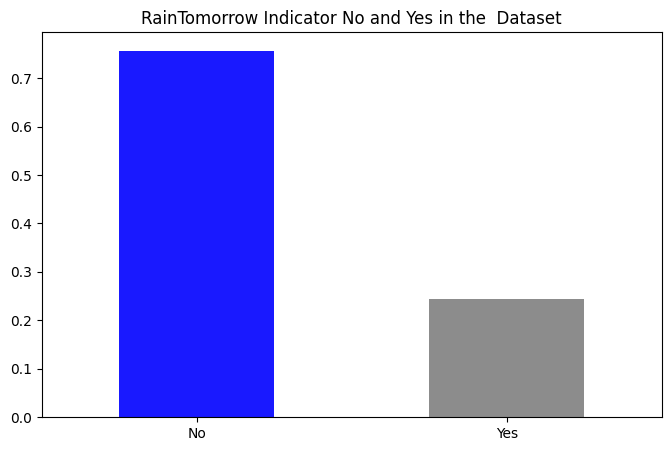

In [115]:
#Plotting the valuecounts of Column 'Raintomorrow'
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['blue','grey'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No and Yes in the  Dataset')
plt.show()

In [116]:
df['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

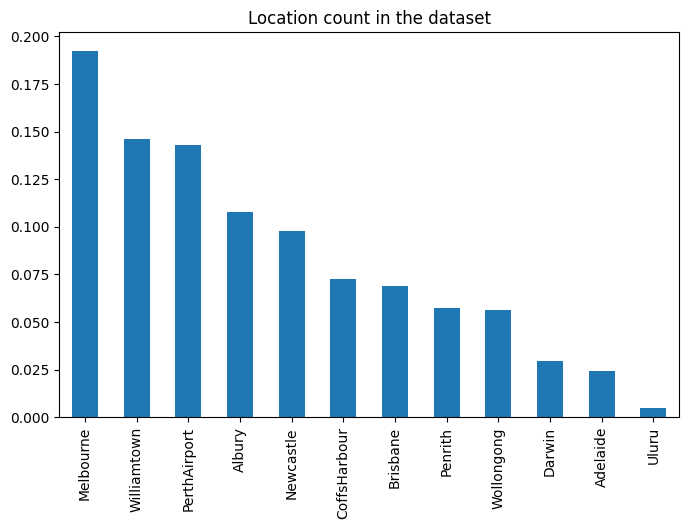

In [117]:
#Plotting the valuecounts of Column
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
df.Location.value_counts(normalize = True).plot(kind='bar')
plt.title('Location count in the dataset')
plt.show()

#Null Values

In [118]:
df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<Axes: >

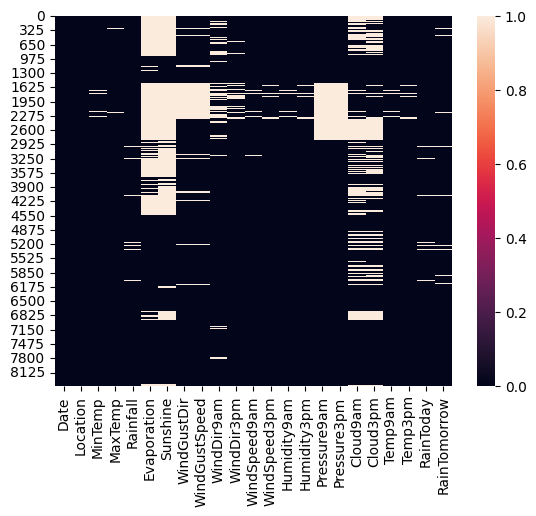

In [119]:
#Missing Pattern in data in a heatmap
import seaborn as sns
sns.heatmap(df.isnull())

'Evaporation','Sunshine','Cloud9am','Cloud3pm' columns have the most missing values

In [120]:
#MIssing value information in the data for 4 columns
missing = pd.DataFrame({
    'Total': df.isnull().sum(),
    'Percent': (df.isnull().sum() / len(df)) * 100
}).sort_values(by='Total', ascending=False)

missing.head(4)

,Total,Percent
Sunshine,3994,47.406528
Evaporation,3512,41.685460
Cloud3pm,2455,29.139466
Cloud9am,2421,28.735905


Since our dataset is small and all the 4 columns has <50% missing data,we consider these columns without eliminating them

#Plots

<Axes: >

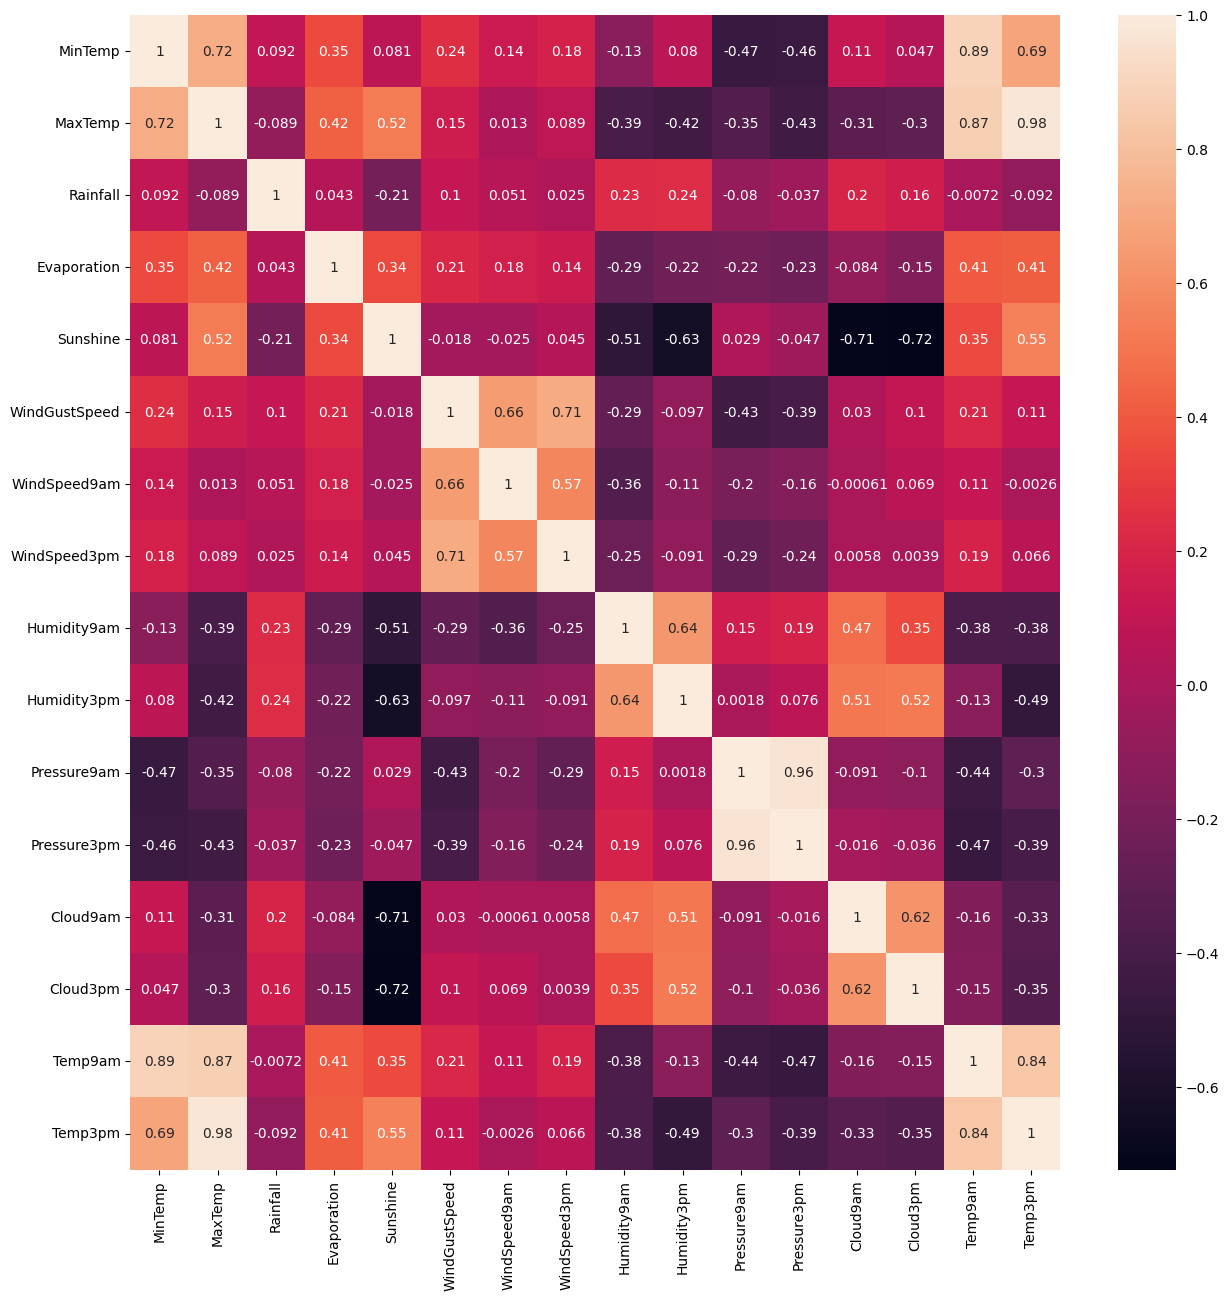

In [121]:
#Correlation Plots
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True)

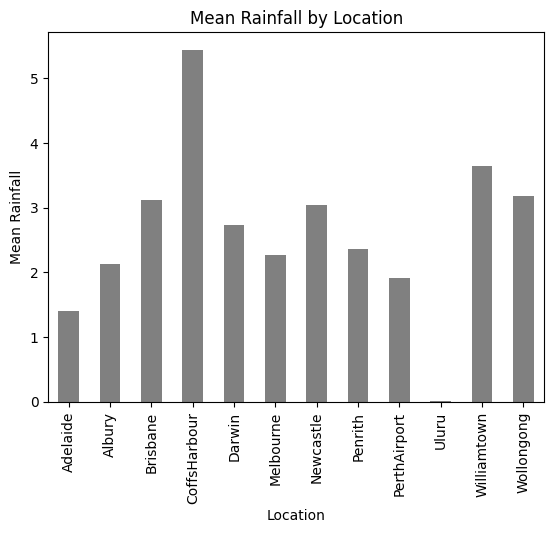

In [122]:
# Mean Rainfall bY location

df.groupby('Location').mean()['Rainfall'].plot(kind='bar', color='grey')
plt.title('Mean Rainfall by Location')
plt.xlabel('Location')
plt.ylabel('Mean Rainfall')
plt.show()

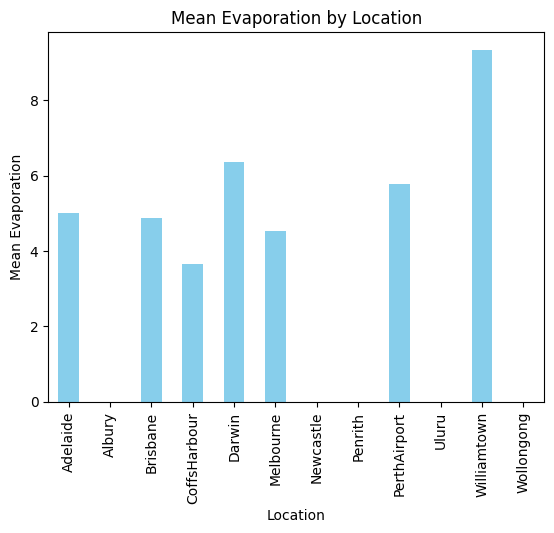

In [123]:
# Mean Evaporation bY location

df.groupby('Location').mean()['Evaporation'].plot(kind='bar', color='skyblue')
plt.title('Mean Evaporation by Location')
plt.xlabel('Location')
plt.ylabel('Mean Evaporation')
plt.show()

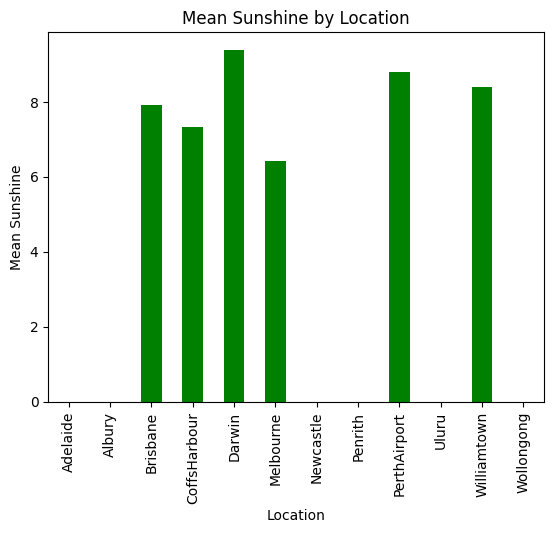

In [124]:
# Mean Sunshine bY location

df.groupby('Location').mean()['Sunshine'].plot(kind='bar', color='green')
plt.title('Mean Sunshine by Location')
plt.xlabel('Location')
plt.ylabel('Mean Sunshine')
plt.show()

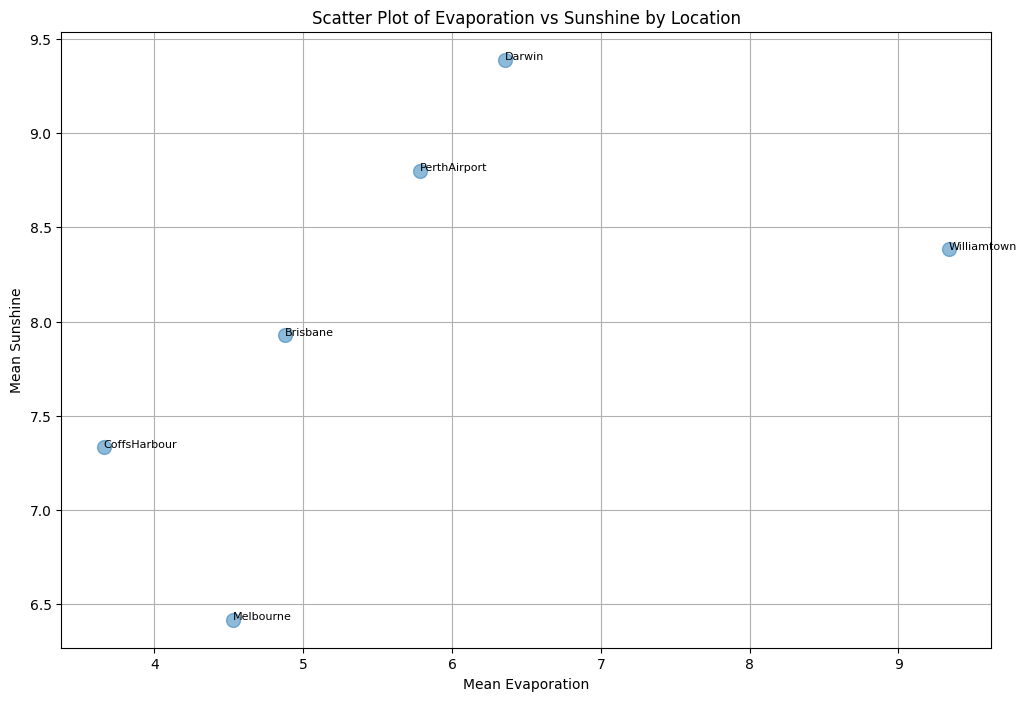

In [125]:
grouped_data = df.groupby('Location')[['Evaporation', 'Sunshine']].mean()

# Plot a scatter plot for 'Evaporation' and 'Sunshine' by location

fig, ax = plt.subplots(figsize=(12, 8))
scatter = plt.scatter(grouped_data['Evaporation'], grouped_data['Sunshine'], s=100, alpha=0.5)

# Add labels for each point (location)
for i, txt in enumerate(grouped_data.index):
    plt.text(grouped_data['Evaporation'][i], grouped_data['Sunshine'][i], txt, fontsize=8)

plt.title('Scatter Plot of Evaporation vs Sunshine by Location')
plt.xlabel('Mean Evaporation')
plt.ylabel('Mean Sunshine')
plt.grid(True)
plt.show()

In [126]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [127]:
df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [128]:
df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].mean(), inplace=True)
df['Temp9am'].fillna(df['Temp9am'].mean(), inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(), inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].mean(), inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].mean(), inplace=True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean(), inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean(), inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean(), inplace=True)
df['Rainfall'].fillna(df['Rainfall'].mode()[0], inplace=True)

In [129]:
df['RainToday'].value_counts()

No     6195
Yes    1990
Name: RainToday, dtype: int64

In [130]:
df['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

In [131]:
df = df.dropna(subset=['RainToday', 'RainTomorrow','Date'])

In [132]:
df.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation      3377
Sunshine         3839
WindGustDir       945
WindGustSpeed       0
WindDir9am        795
WindDir3pm        283
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am      1285
Pressure3pm      1286
Cloud9am         2207
Cloud3pm         2247
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
dtype: int64

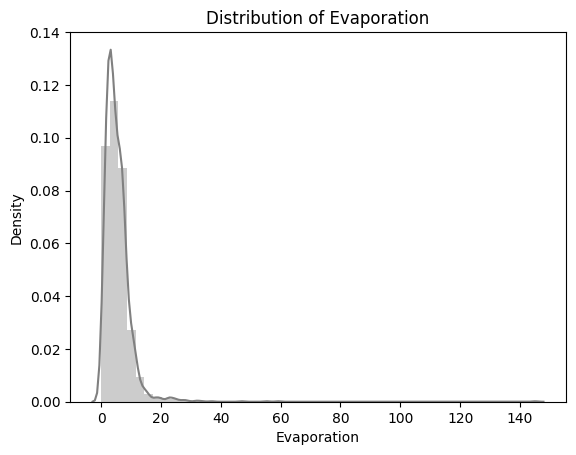

In [133]:
# Distribution plot for Evaporation
sns.distplot(df['Evaporation'], color='grey')
plt.title('Distribution of Evaporation')
plt.show()

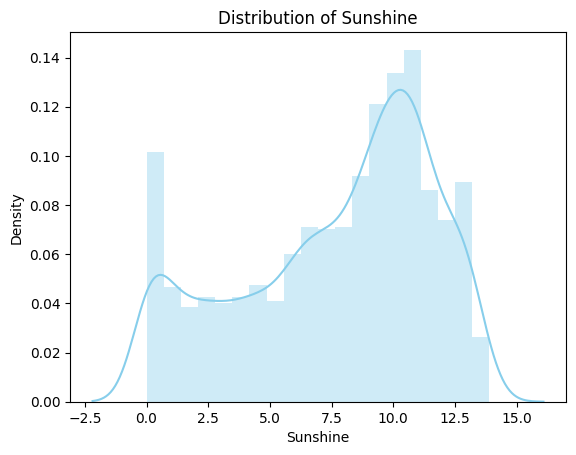

In [134]:
# Distribution plot for Sunshine
sns.distplot(df['Sunshine'], color='skyblue')
plt.title('Distribution of Sunshine')
plt.show()

In [135]:
#dropiing column due to high number of missing values
df = df.drop(columns=['Evaporation','Sunshine','Date'])
df.shape

(8079, 20)

In [136]:
df=df.dropna()

In [137]:
df.shape

(4551, 20)

In [138]:
#using labelencoder
#changing cat val to digits
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = le.fit_transform(df[col])

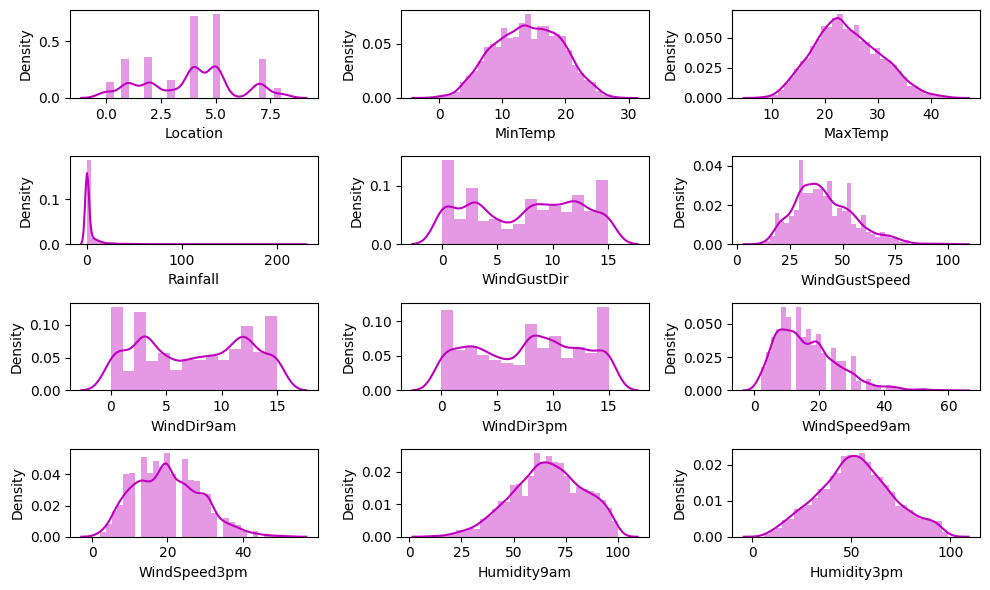

In [139]:
#distribution plot
plt.figure(figsize=(10, 6),facecolor='white')
plotnumber = 1

for i in df:
  if df[i].dtype != 'O':
      if plotnumber <= 12:
          ax = plt.subplot(4, 3, plotnumber)
          sns.distplot(df[i], color='m')  # Use histplot instead of displot for individual axes
          plt.xlabel(i)
          plt.yticks(rotation=0, fontsize=10)
      plotnumber += 1

plt.tight_layout()
plt.show()

In [140]:
#Skewness score
df.skew()

Location        -0.051075
MinTemp         -0.047619
MaxTemp          0.269421
Rainfall         8.876916
WindGustDir     -0.074180
WindGustSpeed    0.680039
WindDir9am      -0.011999
WindDir3pm      -0.074882
WindSpeed9am     0.956234
WindSpeed3pm     0.372817
Humidity9am     -0.233271
Humidity3pm      0.092721
Pressure9am     -0.012404
Pressure3pm      0.004129
Cloud9am        -0.279907
Cloud3pm        -0.240965
Temp9am         -0.004796
Temp3pm          0.273522
RainToday        1.005086
RainTomorrow     0.995257
dtype: float64

In [141]:
df['RainTomorrow'].value_counts()

0    3289
1    1262
Name: RainTomorrow, dtype: int64

In [142]:
#Selecting feature and target variable
x=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']

In [143]:
x['RainToday'].value_counts()

0    3297
1    1254
Name: RainToday, dtype: int64

In [144]:
x.skew()

Location        -0.051075
MinTemp         -0.047619
MaxTemp          0.269421
Rainfall         8.876916
WindGustDir     -0.074180
WindGustSpeed    0.680039
WindDir9am      -0.011999
WindDir3pm      -0.074882
WindSpeed9am     0.956234
WindSpeed3pm     0.372817
Humidity9am     -0.233271
Humidity3pm      0.092721
Pressure9am     -0.012404
Pressure3pm      0.004129
Cloud9am        -0.279907
Cloud3pm        -0.240965
Temp9am         -0.004796
Temp3pm          0.273522
RainToday        1.005086
dtype: float64

In [146]:
x['Rainfall']=np.log1p(x['Rainfall'])
x['WindSpeed9am']=np.log1p(x['WindSpeed9am'])
x['RainToday']=np.log1p(x['RainToday'])

In [148]:
x.skew()

Location        -0.051075
MinTemp         -0.047619
MaxTemp          0.269421
Rainfall         1.673752
WindGustDir     -0.074180
WindGustSpeed    0.680039
WindDir9am      -0.011999
WindDir3pm      -0.074882
WindSpeed9am    -0.461648
WindSpeed3pm     0.372817
Humidity9am     -0.233271
Humidity3pm      0.092721
Pressure9am     -0.012404
Pressure3pm      0.004129
Cloud9am        -0.279907
Cloud3pm        -0.240965
Temp9am         -0.004796
Temp3pm          0.273522
RainToday        1.005086
dtype: float64

In [147]:
x.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [149]:
x.describe()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
count,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000
mean,3.881125,14.043614,24.222259,0.604431,7.462755,41.371347,7.537245,7.665348,2.687154,20.106131,66.364238,52.328609,1017.455548,1015.087915,4.510877,4.506043,18.657202,22.733048,0.190992
std,2.047389,5.222617,6.161171,1.027504,4.816306,14.023500,4.765892,4.645861,0.593072,8.829219,16.941184,18.602816,6.669492,6.631825,2.834684,2.724879,5.586438,6.010105,0.309724
min,0.000000,-1.300000,8.200000,0.000000,0.000000,11.000000,0.000000,0.000000,1.098612,2.000000,11.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000
25%,2.000000,10.100000,19.800000,0.000000,3.000000,31.000000,3.000000,3.000000,2.302585,13.000000,55.000000,40.000000,1013.000000,1010.400000,1.000000,2.000000,14.700000,18.500000,0.000000
50%,4.000000,14.000000,23.600000,0.000000,8.000000,39.000000,8.000000,8.000000,2.772589,20.000000,67.000000,52.000000,1017.400000,1015.200000,5.000000,5.000000,18.500000,22.200000,0.000000
75%,5.000000,18.000000,28.400000,0.955511,12.000000,50.000000,12.000000,12.000000,3.135494,26.000000,79.000000,65.000000,1021.800000,1019.600000,7.000000,7.000000,22.900000,26.800000,0.693147
max,8.000000,28.500000,43.600000,5.420535,15.000000,102.000000,15.000000,15.000000,4.127134,52.000000,100.000000,99.000000,1039.000000,1035.600000,8.000000,8.000000,39.400000,42.400000,0.693147


In [151]:
# Select numerical columns to standardize
from sklearn.preprocessing import StandardScaler
numerical_columns = ['Rainfall', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday']

scaler = StandardScaler()
scaler.fit(x[numerical_columns])
x[numerical_columns] = scaler.transform(x[numerical_columns])

In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

def drop_highest_vif(data_frame):
    while True:
        vif_data = calculate_vif(data_frame)
        max_vif_index = vif_data['VIF'].idxmax()
        max_vif = vif_data.loc[max_vif_index, 'VIF']

        if max_vif > 5:
            print(f"Dropping variable '{vif_data.loc[max_vif_index, 'Variable']}' with VIF {max_vif}")
            data_frame = data_frame.drop(columns=[vif_data.loc[max_vif_index, 'Variable']])
        else:
            break

    return data_frame

# Initial VIF calculation
initial_vif_data = calculate_vif(x)
print("Initial VIF:")
print(initial_vif_data)

# Drop variables iteratively until all VIF values are less than 5
x_after_vif = drop_highest_vif(x)

# Final VIF calculation
final_vif_data = calculate_vif(x_after_vif)
print("\nFinal VIF:")
print(final_vif_data)

Initial VIF:
         Variable         VIF
0        Location    6.144202
1         MinTemp   58.019711
2         MaxTemp  119.812027
3        Rainfall    4.942709
4     WindGustDir    6.260769
5   WindGustSpeed   29.036075
6      WindDir9am    5.332582
7      WindDir3pm    5.980818
8    WindSpeed9am    2.134426
9    WindSpeed3pm    2.195581
10    Humidity9am    4.398414
11    Humidity3pm   54.776388
12    Pressure9am   22.765547
13    Pressure3pm   21.928490
14       Cloud9am    7.762376
15       Cloud3pm    7.161129
16        Temp9am   14.040013
17        Temp3pm   27.163590
18      RainToday    4.800988
Dropping variable 'MaxTemp' with VIF 119.81202657722267
Dropping variable 'MinTemp' with VIF 44.14384263964094
Dropping variable 'Humidity3pm' with VIF 26.597824607618293
Dropping variable 'Pressure9am' with VIF 20.48164263399758
Dropping variable 'WindGustSpeed' with VIF 10.817827422902258
Dropping variable 'Cloud9am' with VIF 6.519413262865968
Dropping variable 'WindGustDir' with VI

In [153]:
final_vif_data['Variable'].unique()

array(['Location', 'Rainfall', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Pressure3pm', 'Cloud3pm',
       'Temp9am', 'RainToday'], dtype=object)

In [154]:
x=x[['Location', 'Rainfall', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Pressure3pm', 'Cloud3pm',
       'Temp9am', 'RainToday']]

#Model Selection

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAcc=0
maxRs=0

for i in range(1,200):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i,stratify=y)
  RFC=RandomForestClassifier()
  RFC.fit(x_train,y_train)
  pred=RFC.predict(x_test)
  acc=accuracy_score(y_test,pred)
  if acc>maxAcc:
    maxAcc=acc
    maxRs=i
print('Best Accuracy', maxAcc, 'random_state is', maxRs)

Best Accuracy 0.890190336749634 random_state is 181


In [157]:
#train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=maxRs,stratify=y)

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [159]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred_lg=lg.predict(x_test)
print(accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

0.8096632503660323
[[910  77]
 [183 196]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.88       987
           1       0.72      0.52      0.60       379

    accuracy                           0.81      1366
   macro avg       0.78      0.72      0.74      1366
weighted avg       0.80      0.81      0.80      1366



In [160]:
#RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print(accuracy_score(y_test,pred_RFC))
print(confusion_matrix(y_test,pred_RFC))
print(classification_report(y_test,pred_RFC))

0.8784773060029283
[[942  45]
 [121 258]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       987
           1       0.85      0.68      0.76       379

    accuracy                           0.88      1366
   macro avg       0.87      0.82      0.84      1366
weighted avg       0.88      0.88      0.87      1366



In [161]:
#SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.8103953147877013
[[940  47]
 [212 167]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       987
           1       0.78      0.44      0.56       379

    accuracy                           0.81      1366
   macro avg       0.80      0.70      0.72      1366
weighted avg       0.81      0.81      0.79      1366



In [162]:
#GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_GB=GB.predict(x_test)
print(accuracy_score(y_test,pred_GB))
print(confusion_matrix(y_test,pred_GB))
print(classification_report(y_test,pred_GB))

0.8345534407027818
[[925  62]
 [164 215]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       987
           1       0.78      0.57      0.66       379

    accuracy                           0.83      1366
   macro avg       0.81      0.75      0.77      1366
weighted avg       0.83      0.83      0.83      1366



In [163]:
#AdaBoostClassifier
Ada=AdaBoostClassifier()
Ada.fit(x_train,y_train)
pred_Ada=Ada.predict(x_test)
print(accuracy_score(y_test,pred_Ada))
print(confusion_matrix(y_test,pred_Ada))
print(classification_report(y_test,pred_Ada))

0.8125915080527086
[[903  84]
 [172 207]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       987
           1       0.71      0.55      0.62       379

    accuracy                           0.81      1366
   macro avg       0.78      0.73      0.75      1366
weighted avg       0.80      0.81      0.80      1366



In [164]:
#BaggingClassifier
bc=BaggingClassifier()
bc.fit(x_train,y_train)
pred_bc=bc.predict(x_test)
print(accuracy_score(y_test,pred_bc))
print(confusion_matrix(y_test,pred_bc))
print(classification_report(y_test,pred_bc))

0.8726207906295754
[[942  45]
 [129 250]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       987
           1       0.85      0.66      0.74       379

    accuracy                           0.87      1366
   macro avg       0.86      0.81      0.83      1366
weighted avg       0.87      0.87      0.87      1366



In [165]:
#ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier
et=ExtraTreeClassifier()
et.fit(x_train,y_train)
pred_et=et.predict(x_test)
print(accuracy_score(y_test,pred_et))
print(confusion_matrix(y_test,pred_et))
print(classification_report(y_test,pred_et))

0.8191800878477306
[[868 119]
 [128 251]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       987
           1       0.68      0.66      0.67       379

    accuracy                           0.82      1366
   macro avg       0.77      0.77      0.77      1366
weighted avg       0.82      0.82      0.82      1366



#Cross Validation

In [166]:
#check cv score for logistic regression

score=cross_val_score(lg,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_lg) - score.mean())

[0.76399561 0.75274725 0.78681319 0.7978022  0.8       ]
0.7802716493166548
Difference between accuracy score and cross valication score is 0.029391601049377436


In [167]:
#check cv score for randomforest

score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_RFC) - score.mean())

[0.79582876 0.84615385 0.89010989 0.85274725 0.77802198]
0.8325723453275595
Difference between accuracy score and cross valication score is 0.045904960675368756


In [168]:
#check cv score for svc

score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_svc) - score.mean())

[0.77497256 0.75604396 0.78351648 0.77692308 0.7956044 ]
0.7774120939433782
Difference between accuracy score and cross valication score is 0.03298322084432315


In [169]:
#check cv score for Gradient Boosting

score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_GB) - score.mean())

[0.73326015 0.75384615 0.79120879 0.76923077 0.73516484]
0.7565421406255654
Difference between accuracy score and cross valication score is 0.07801130007721646


In [170]:
#check cv score for Adaboost

score=cross_val_score(Ada,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_Ada) - score.mean())

[0.72008782 0.72197802 0.78021978 0.74505495 0.71978022]
0.7374241565240467
Difference between accuracy score and cross valication score is 0.07516735152866194


In [171]:
#check cv score for Bagging Classifier

score=cross_val_score(bc,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_bc) - score.mean())

[0.766191   0.85384615 0.89230769 0.84615385 0.76593407]
0.8248865514288127
Difference between accuracy score and cross valication score is 0.047734239200762696


In [172]:
#check cv score for Extra Tree Classifier

score=cross_val_score(et,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_et) - score.mean())

[0.68276619 0.85604396 0.8978022  0.77912088 0.71428571]
0.78600378765033
Difference between accuracy score and cross valication score is 0.03317630019740059


AUC: 0.88


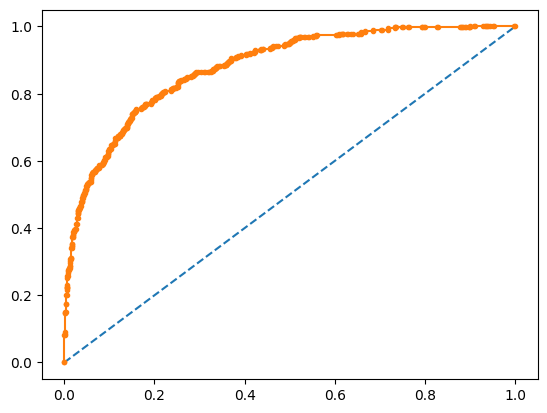

In [173]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

probs = GB.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

#OverSampling

In [174]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [175]:
y1.value_counts()

0    3289
1    3289
Name: RainTomorrow, dtype: int64

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAcc=0
maxRs=0

for i in range(1,200):
  x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.3,random_state=i)
  RFC=RandomForestClassifier()
  RFC.fit(x_train,y_train)
  pred=RFC.predict(x_test)
  acc=accuracy_score(y_test,pred)
  if acc>maxAcc:
    maxAcc=acc
    maxRs=i
print('Best Accuracy', maxAcc, 'random_state is', maxRs)

Best Accuracy 0.9285714285714286 random_state is 29


In [177]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.3,random_state=maxRs)

In [178]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred_lg=lg.predict(x_test)
print(accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

0.7887537993920972
[[758 235]
 [182 799]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       993
           1       0.77      0.81      0.79       981

    accuracy                           0.79      1974
   macro avg       0.79      0.79      0.79      1974
weighted avg       0.79      0.79      0.79      1974



In [179]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print(accuracy_score(y_test,pred_RFC))
print(confusion_matrix(y_test,pred_RFC))
print(classification_report(y_test,pred_RFC))

0.9270516717325228
[[918  75]
 [ 69 912]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       993
           1       0.92      0.93      0.93       981

    accuracy                           0.93      1974
   macro avg       0.93      0.93      0.93      1974
weighted avg       0.93      0.93      0.93      1974



In [180]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.795339412360689
[[724 269]
 [135 846]]
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       993
           1       0.76      0.86      0.81       981

    accuracy                           0.80      1974
   macro avg       0.80      0.80      0.79      1974
weighted avg       0.80      0.80      0.79      1974



In [181]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_GB=GB.predict(x_test)
print(accuracy_score(y_test,pred_GB))
print(confusion_matrix(y_test,pred_GB))
print(classification_report(y_test,pred_GB))

0.8546099290780141
[[833 160]
 [127 854]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       993
           1       0.84      0.87      0.86       981

    accuracy                           0.85      1974
   macro avg       0.85      0.85      0.85      1974
weighted avg       0.86      0.85      0.85      1974



In [182]:
Ada=AdaBoostClassifier()
Ada.fit(x_train,y_train)
pred_Ada=Ada.predict(x_test)
print(accuracy_score(y_test,pred_Ada))
print(confusion_matrix(y_test,pred_Ada))
print(classification_report(y_test,pred_Ada))

0.8080040526849037
[[785 208]
 [171 810]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       993
           1       0.80      0.83      0.81       981

    accuracy                           0.81      1974
   macro avg       0.81      0.81      0.81      1974
weighted avg       0.81      0.81      0.81      1974



In [183]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
pred_bc=bc.predict(x_test)
print(accuracy_score(y_test,pred_bc))
print(confusion_matrix(y_test,pred_bc))
print(classification_report(y_test,pred_bc))

0.9108409321175278
[[917  76]
 [100 881]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       993
           1       0.92      0.90      0.91       981

    accuracy                           0.91      1974
   macro avg       0.91      0.91      0.91      1974
weighted avg       0.91      0.91      0.91      1974



In [184]:
from sklearn.tree import ExtraTreeClassifier
et=ExtraTreeClassifier()
et.fit(x_train,y_train)
pred_et=et.predict(x_test)
print(accuracy_score(y_test,pred_et))
print(confusion_matrix(y_test,pred_et))
print(classification_report(y_test,pred_et))

0.8530901722391084
[[827 166]
 [124 857]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       993
           1       0.84      0.87      0.86       981

    accuracy                           0.85      1974
   macro avg       0.85      0.85      0.85      1974
weighted avg       0.85      0.85      0.85      1974



#Cross Validation After OverSampling

In [185]:
#check cv score for logistic regression

score=cross_val_score(lg,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_lg) - score.mean())

[0.70972644 0.65349544 0.76139818 0.83726236 0.78174905]
0.7487262935268759
Difference between accuracy score and cross valication score is 0.0400275058652213


In [186]:
#check cv score for randomforest

score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_RFC) - score.mean())

[0.79179331 0.84650456 0.93844985 0.93764259 0.88288973]
0.8794560079512754
Difference between accuracy score and cross valication score is 0.047595663781247355


In [187]:
#check cv score for svc

score=cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_svc) - score.mean())

[0.71504559 0.64741641 0.76443769 0.84258555 0.81064639]
0.756026327042426
Difference between accuracy score and cross valication score is 0.03931308531826294


In [188]:
#check cv score for Gradient Boosting

score=cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_GB) - score.mean())

[0.67401216 0.64209726 0.84726444 0.91254753 0.83878327]
0.7829409317322915
Difference between accuracy score and cross valication score is 0.07166899734572263


In [189]:
#check cv score for Adaboost

score=cross_val_score(Ada,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_Ada) - score.mean())

[0.62993921 0.60334347 0.79559271 0.8486692  0.79163498]
0.7338359124897431
Difference between accuracy score and cross valication score is 0.0741681401951606


In [190]:
#check cv score for Bagging Classifier

score=cross_val_score(bc,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_bc) - score.mean())

[0.80015198 0.81231003 0.92553191 0.91787072 0.86844106]
0.8648611416089775
Difference between accuracy score and cross valication score is 0.04597979050855028


In [191]:
#check cv score for ExtraTree Classifier

score=cross_val_score(et,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_et) - score.mean())

[0.72568389 0.8449848  0.88829787 0.82737643 0.8121673 ]
0.8197020583170571
Difference between accuracy score and cross valication score is 0.03338811392205132


RandomForest Performs Best

#Hyper Parameter Tuning

In [192]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [193]:
# Create the grid search object
grid_search = GridSearchCV(RFC, param_grid, cv=5,verbose=2)

# Fit the grid search object to the data
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_dep

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [196]:
print('Best parameters:', grid_search.best_params_)
print('Best estimator:', grid_search.best_estimator_)
print('Best score:', grid_search.best_score_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best estimator: RandomForestClassifier(n_estimators=200)
Best score: 0.8922711608365198


In [197]:
final_model=RandomForestClassifier(n_estimators=200)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

93.16109422492401


AUC: 0.98


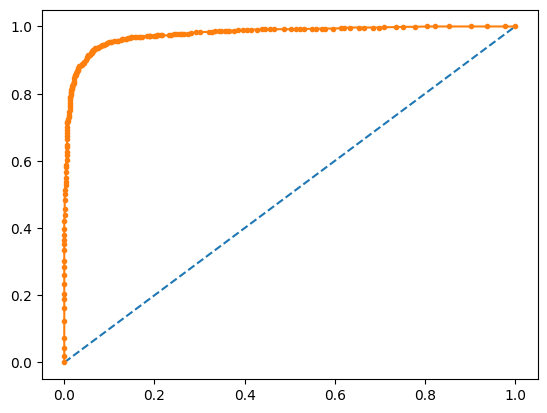

In [198]:
GB_tuned = grid_search.best_estimator_

probs = GB_tuned.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [199]:
predictions = final_model.predict(x_test)

In [200]:
conclusion={"Predictions:": predictions, 'Actual': y_test}

In [201]:
conclusion=pd.DataFrame(conclusion)
conclusion

,Predictions:,Actual
890,1,1
5265,1,1
4137,0,0
5725,1,1
6403,0,1
...,...,...
5688,1,1
4762,1,1
5311,1,1
1873,0,0


#Predicting Amount Of Rainfall

In [204]:
x=df.drop('Rainfall',axis=1)
y=df['Rainfall']

In [205]:
x.skew()

Location        -0.051075
MinTemp         -0.047619
MaxTemp          0.269421
WindGustDir     -0.074180
WindGustSpeed    0.680039
WindDir9am      -0.011999
WindDir3pm      -0.074882
WindSpeed9am     0.956234
WindSpeed3pm     0.372817
Humidity9am     -0.233271
Humidity3pm      0.092721
Pressure9am     -0.012404
Pressure3pm      0.004129
Cloud9am        -0.279907
Cloud3pm        -0.240965
Temp9am         -0.004796
Temp3pm          0.273522
RainToday        1.005086
RainTomorrow     0.995257
dtype: float64

In [206]:
x['WindSpeed9am']=np.log1p(x['WindSpeed9am'])
x['RainToday']=np.log1p(x['RainToday'])
x['RainTomorrow']=np.log1p(x['RainTomorrow'])

In [207]:
x.skew()

Location        -0.051075
MinTemp         -0.047619
MaxTemp          0.269421
WindGustDir     -0.074180
WindGustSpeed    0.680039
WindDir9am      -0.011999
WindDir3pm      -0.074882
WindSpeed9am    -0.461648
WindSpeed3pm     0.372817
Humidity9am     -0.233271
Humidity3pm      0.092721
Pressure9am     -0.012404
Pressure3pm      0.004129
Cloud9am        -0.279907
Cloud3pm        -0.240965
Temp9am         -0.004796
Temp3pm          0.273522
RainToday        1.005086
RainTomorrow     0.995257
dtype: float64

In [210]:
# Select numerical columns to standardize
from sklearn.preprocessing import StandardScaler
numerical_columns = ['WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday','RainTomorrow']

scaler = StandardScaler()
scaler.fit(x[numerical_columns])
x[numerical_columns] = scaler.transform(x[numerical_columns])

In [211]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

def drop_highest_vif(data_frame):
    while True:
        vif_data = calculate_vif(data_frame)
        max_vif_index = vif_data['VIF'].idxmax()
        max_vif = vif_data.loc[max_vif_index, 'VIF']

        if max_vif > 5:
            print(f"Dropping variable '{vif_data.loc[max_vif_index, 'Variable']}' with VIF {max_vif}")
            data_frame = data_frame.drop(columns=[vif_data.loc[max_vif_index, 'Variable']])
        else:
            break

    return data_frame

# Initial VIF calculation
initial_vif_data = calculate_vif(x)
print("Initial VIF:")
print(initial_vif_data)

# Drop variables iteratively until all VIF values are less than 5
x_after_vif = drop_highest_vif(x)

# Final VIF calculation
final_vif_data = calculate_vif(x_after_vif)
print("\nFinal VIF:")
print(final_vif_data)

Initial VIF:
         Variable         VIF
0        Location    6.150710
1         MinTemp   58.491685
2         MaxTemp  125.816057
3     WindGustDir    6.259545
4   WindGustSpeed   30.160537
5      WindDir9am    5.319586
6      WindDir3pm    5.981090
7    WindSpeed9am    2.129257
8    WindSpeed3pm    2.195502
9     Humidity9am    4.343863
10    Humidity3pm   58.252535
11    Pressure9am   22.751576
12    Pressure3pm   21.973177
13       Cloud9am    7.766031
14       Cloud3pm    7.290872
15        Temp9am   14.052953
16        Temp3pm   27.574602
17      RainToday    1.529034
18   RainTomorrow    1.637531
Dropping variable 'MaxTemp' with VIF 125.81605689376511
Dropping variable 'MinTemp' with VIF 46.37213480023406
Dropping variable 'Humidity3pm' with VIF 26.56775232313443
Dropping variable 'Pressure9am' with VIF 20.441318404556043
Dropping variable 'WindGustSpeed' with VIF 10.879108505826661
Dropping variable 'Cloud9am' with VIF 6.519922060242196
Dropping variable 'WindGustDir' with VI

In [217]:
final_vif_data['Variable'].unique()

array(['Location', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Pressure3pm', 'Cloud3pm',
       'Temp9am', 'RainToday', 'RainTomorrow'], dtype=object)

In [218]:
x=x[['Location', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Pressure3pm', 'Cloud3pm',
       'Temp9am', 'RainToday', 'RainTomorrow']]

#Model Selection

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [220]:
#finding best random state
maxAcc=0
maxRs=0

for i in range(1,200):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i)
  lr=LinearRegression()
  lr.fit(x_train,y_train)
  pred=lr.predict(x_test)
  acc=r2_score(y_test,pred)
  if acc>maxAcc:
    maxAcc=acc
    maxRs=i
print('Best Accuracy', maxAcc, 'random_state is', maxRs)

Best Accuracy 0.3630586595580306 random_state is 150


#Train Test Split

In [221]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=maxRs)

#Model Fitting

In [222]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge

In [223]:
#Linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_lr))
print('MAE',mean_absolute_error(y_test,pred_lr))
print('MSE',mean_squared_error(y_test,pred_lr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 Score 0.3630586595580306
MAE 3.37955742443556
MSE 41.45930791851855
RMSE 6.438890270731328


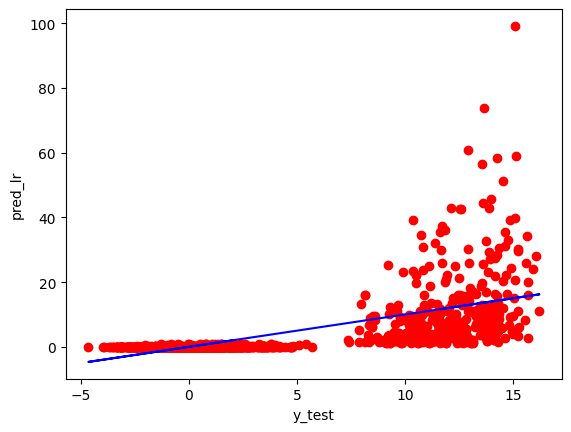

In [224]:
plt.scatter(x=pred_lr,y=y_test,color='red')
plt.plot(pred_lr,pred_lr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_lr')
plt.show()

In [225]:
#RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_rfr))
print('MAE',mean_absolute_error(y_test,pred_rfr))
print('MSE',mean_squared_error(y_test,pred_rfr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2 Score 0.48332187261782567
MAE 2.1004363103953145
MSE 33.631225071742314
RMSE 5.799243491330771


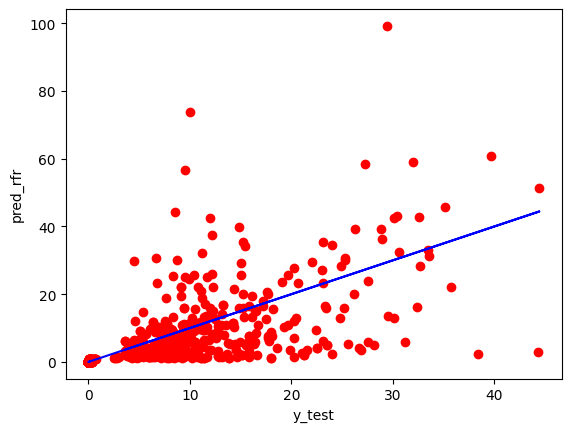

In [226]:
plt.scatter(x=pred_rfr,y=y_test,color='red')
plt.plot(pred_rfr,pred_rfr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_rfr')
plt.show()

In [227]:
#KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print('R2 Score',r2_score(y_test,pred_knn))
print('MAE',mean_absolute_error(y_test,pred_knn))
print('MSE',mean_squared_error(y_test,pred_knn))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 Score 0.31036957933135845
MAE 2.456515373352855
MSE 44.88890600292826
RMSE 6.699918357930062


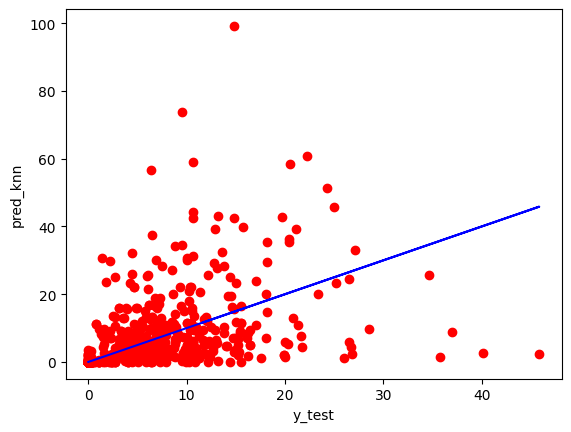

In [228]:
plt.scatter(x=pred_knn,y=y_test,color='red')
plt.plot(pred_knn,pred_knn,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_knn')
plt.show()

In [229]:
#GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_gbr))
print('MAE',mean_absolute_error(y_test,pred_gbr))
print('MSE',mean_squared_error(y_test,pred_gbr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2 Score 0.39960032961838443
MAE 2.54878667069042
MSE 39.0807649433713
RMSE 6.25146102470225


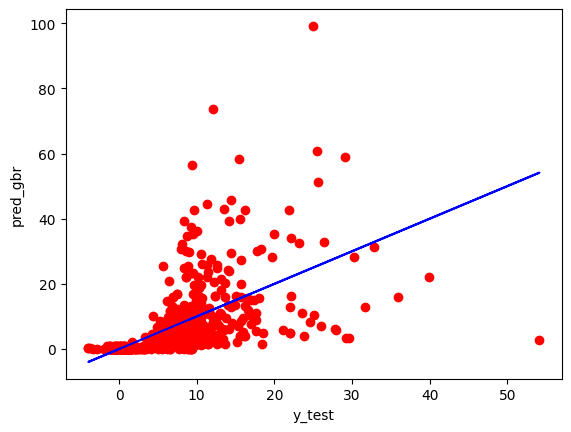

In [230]:
plt.scatter(x=pred_gbr,y=y_test,color='red')
plt.plot(pred_gbr,pred_gbr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_gbr')
plt.show()

In [231]:
#Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
print('R2 Score',r2_score(y_test,pred_lasso))
print('MAE',mean_absolute_error(y_test,pred_lasso))
print('MSE',mean_squared_error(y_test,pred_lasso))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2 Score 0.3535466699412856
MAE 2.8010638848169047
MSE 42.07845521105375
RMSE 6.486790825289016


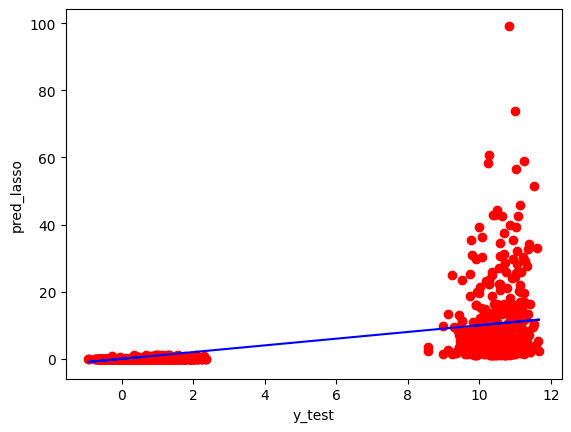

In [232]:
plt.scatter(x=pred_lasso,y=y_test,color='red')
plt.plot(pred_lasso,pred_lasso,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_lasso')
plt.show()

In [233]:
ridge=Ridge()
ridge.fit(x_train,y_train)
pred_ridge=ridge.predict(x_test)
print('R2 Score',r2_score(y_test,pred_ridge))
print('MAE',mean_absolute_error(y_test,pred_ridge))
print('MSE',mean_squared_error(y_test,pred_ridge))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2 Score 0.3630816418582816
MAE 3.3791492449919343
MSE 41.45781197187122
RMSE 6.438774104740065


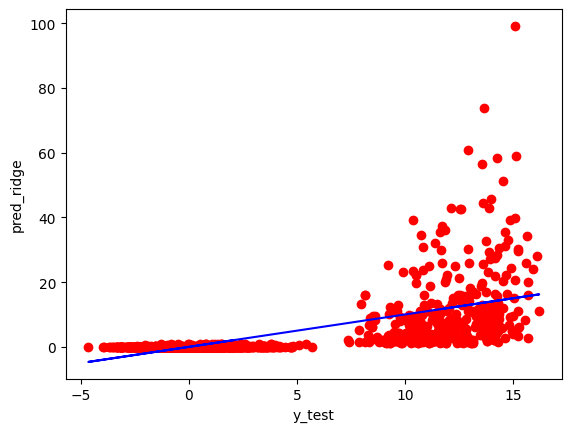

In [234]:
plt.scatter(x=pred_ridge,y=y_test,color='red')
plt.plot(pred_ridge,pred_ridge,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_ridge')
plt.show()

In [235]:
#DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_dtr))
print('MAE',mean_absolute_error(y_test,pred_dtr))
print('MSE',mean_squared_error(y_test,pred_dtr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 Score -0.15441002300782092
MAE 2.3209370424597364
MSE 75.14199121522694
RMSE 8.668448028062864


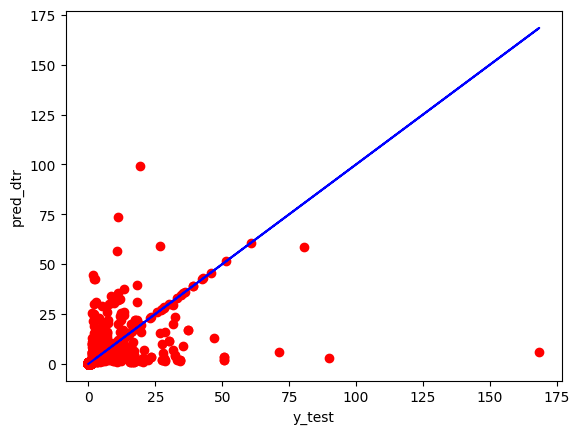

In [236]:
plt.scatter(x=pred_dtr,y=y_test,color='red')
plt.plot(pred_dtr,pred_dtr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_dtr')
plt.show()

In [237]:
#svr
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_svr))
print('MAE',mean_absolute_error(y_test,pred_svr))
print('MSE',mean_squared_error(y_test,pred_svr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 Score 0.20320095602547095
MAE 2.216473634903249
MSE 51.864645636596016
RMSE 7.20171129917022


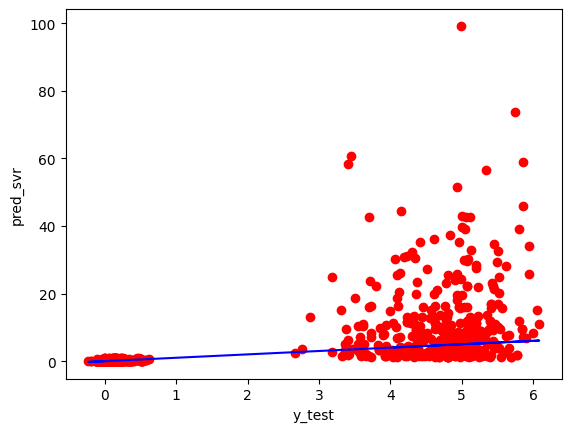

In [238]:
plt.scatter(x=pred_svr,y=y_test,color='red')
plt.plot(pred_svr,pred_svr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_svr')
plt.show()

In [239]:
#ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_etr))
print('MAE',mean_absolute_error(y_test,pred_etr))
print('MSE',mean_squared_error(y_test,pred_etr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2 Score 0.5201779646188542
MAE 1.7772474377745258
MSE 31.232215979502193
RMSE 5.588579066229823


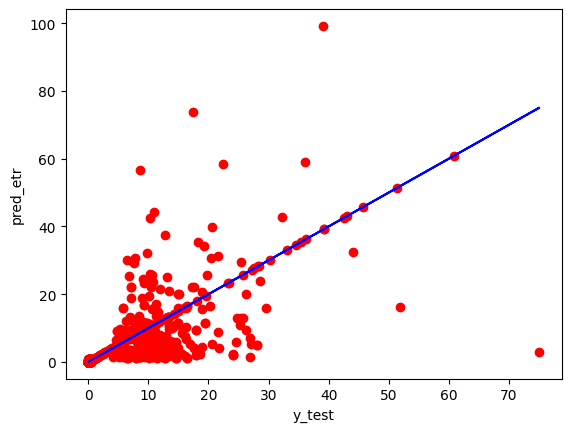

In [240]:
plt.scatter(x=pred_etr,y=y_test,color='red')
plt.plot(pred_etr,pred_etr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_etr')
plt.show()

#Cross Validation

In [241]:
#check cv score for randomforest

score=cross_val_score(rfr,x,y,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross valication score is', (r2_score(y_test,pred_rfr)) - score.mean())

[0.44039296 0.43521611 0.36419868 0.26130553 0.5700417 ]
0.4142309945349364
Difference between R2 score and cross valication score is 0.06909087808288927


In [244]:
#check cv score for extratree

score=cross_val_score(etr,x,y,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross valication score is', (r2_score(y_test,pred_etr)) - score.mean())

[0.54160935 0.47059789 0.40557678 0.38002653 0.52621004]
0.4648041189475456
Difference between R2 score and cross valication score is 0.05537384567130865


#HyperParameter

In [249]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [250]:
grid_search = GridSearchCV(etr, param_grid, cv=5, verbose=2)

# Fit the grid search object to the data
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, min_s

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500]},
             verbose=2)

In [251]:
print('Best parameters:', grid_search.best_params_)
print('Best estimator:', grid_search.best_estimator_)
print('Best score:', grid_search.best_score_)

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best estimator: ExtraTreesRegressor(max_depth=20)
Best score: 0.5858413581690497


In [252]:
#final model
model=ExtraTreesRegressor(max_depth=20)
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('R2 Score',r2_score(y_test,pred))
print('MAE',mean_absolute_error(y_test,pred))
print('MSE',mean_squared_error(y_test,pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

R2 Score 0.5100998527274825
MAE 1.7762434923369126
MSE 31.88821287845012
RMSE 5.646964926263498


In [253]:
conclusion=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['Predicted','Orginal'])

In [254]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365
Predicted,0.167333,0.0,0.0,0.16,0.0,7.537,0.0,0.0,0.118,0.000222,...,0.08576,0.111111,0.003857,0.004,0.028,0.2,7.002,6.311,0.024,2.608
Orginal,0.000000,0.0,0.0,0.00,0.0,3.600,0.0,0.0,0.000,0.000000,...,0.00000,0.000000,0.000000,0.000,0.000,0.2,7.000,5.800,0.000,2.600
